 ## Installing and Loading Packages

In [1]:
# Python version used in this project
from platform import python_version
print('Python Version used in this Jupiter Nootebook:', python_version())

Python Version used in this Jupiter Nootebook: 3.9.13


In [ ]:
! pip install yfinance --upgrade --no-cache-dir

In [ ]:
! pip install pandas-datareader

In [ ]:
! pip install xlwt

In [2]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader
import sqlite3
import yfinance
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Packages versions used in this project
%reload_ext watermark
%watermark -a "Flavio F Ribeiro" --iversions

Author: Flavio F Ribeiro

pandas_datareader: 0.10.0
numpy            : 1.21.5
pandas           : 1.4.4
sqlite3          : 2.6.0
yfinance         : 0.2.11
matplotlib       : 3.5.2



In [ ]:
#Creating the variable for the company stock data

In [4]:
AAPL = "AAPL"

In [5]:
AAPL = yfinance.download(AAPL)

[*********************100%***********************]  1 of 1 completed


## Exploratorion and Data Integrity Check

In [6]:
AAPL.shape

(10633, 6)

In [7]:
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099722,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094519,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087582,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089749,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092351,73449600


In [8]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10633.000000,10633.000000,10633.000000,10633.000000,10633.000000,1.063300e+04
mean,16.818628,17.011740,16.629275,16.828069,16.135021,3.269496e+08
std,35.692780,36.130836,35.272692,35.720691,35.353404,3.376453e+08
min,0.049665,0.049665,0.049107,0.049107,0.038154,0.000000e+00
25%,0.287946,0.295759,0.281250,0.287946,0.237944,1.209600e+08
50%,0.488839,0.495536,0.480357,0.487679,0.404129,2.142336e+08
75%,16.357500,16.486071,16.203571,16.315357,14.103334,4.064760e+08
max,182.630005,182.940002,179.119995,182.009995,180.683868,7.421641e+09


In [9]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10633 entries, 1980-12-12 to 2023-02-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10633 non-null  float64
 1   High       10633 non-null  float64
 2   Low        10633 non-null  float64
 3   Close      10633 non-null  float64
 4   Adj Close  10633 non-null  float64
 5   Volume     10633 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 581.5 KB


## Using SQL

In [10]:
conn = sqlite3.connect("StockPrices/AAPL.db")
c = conn.cursor()

In [12]:
AAPL.to_sql("AAPL", conn, if_exists = 'replace')

10633

In [13]:
# SQL query to DataFrame
df = pd.read_sql_query(""" SELECT * FROM AAPL WHERE Date >= "2020-01-01" """, conn)

In [14]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02 00:00:00,74.059998,75.150002,73.797501,75.087502,73.449387,135480400
1,2020-01-03 00:00:00,74.287498,75.144997,74.125000,74.357498,72.735321,146322800
2,2020-01-06 00:00:00,73.447502,74.989998,73.187500,74.949997,73.314880,118387200
3,2020-01-07 00:00:00,74.959999,75.224998,74.370003,74.597504,72.970070,108872000
4,2020-01-08 00:00:00,74.290001,76.110001,74.290001,75.797501,74.143906,132079200
...,...,...,...,...,...,...,...
781,2023-02-08 00:00:00,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
782,2023-02-09 00:00:00,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
783,2023-02-10 00:00:00,149.460007,151.339996,149.220001,151.009995,151.009995,57409100
784,2023-02-13 00:00:00,150.949997,154.259995,150.919998,153.850006,153.850006,62123800


In [15]:
#Saves as .xls in case we want to whole period
df.to_excel("StockPrices/AAPLfrom020.xls")

In [16]:
#loads in disc
df = pd.read_excel("StockPrices/AAPLfrom020.xls")

In [17]:
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2020-01-02 00:00:00,74.059998,75.150002,73.797501,75.087502,73.449387,135480400
1,1,2020-01-03 00:00:00,74.287498,75.144997,74.125000,74.357498,72.735321,146322800
2,2,2020-01-06 00:00:00,73.447502,74.989998,73.187500,74.949997,73.314880,118387200
3,3,2020-01-07 00:00:00,74.959999,75.224998,74.370003,74.597504,72.970070,108872000
4,4,2020-01-08 00:00:00,74.290001,76.110001,74.290001,75.797501,74.143906,132079200


In [18]:
#Checking 'Date' format.
df['Date']

0      2020-01-02 00:00:00
1      2020-01-03 00:00:00
2      2020-01-06 00:00:00
3      2020-01-07 00:00:00
4      2020-01-08 00:00:00
              ...         
781    2023-02-08 00:00:00
782    2023-02-09 00:00:00
783    2023-02-10 00:00:00
784    2023-02-13 00:00:00
785    2023-02-14 00:00:00
Name: Date, Length: 786, dtype: object

In [20]:
#Transforming the Date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [21]:
df['Date']

0     2020-01-02
1     2020-01-03
2     2020-01-06
3     2020-01-07
4     2020-01-08
         ...    
781   2023-02-08
782   2023-02-09
783   2023-02-10
784   2023-02-13
785   2023-02-14
Name: Date, Length: 786, dtype: datetime64[ns]

In [22]:
#Checking 'Close' format
df['Close']

0       75.087502
1       74.357498
2       74.949997
3       74.597504
4       75.797501
          ...    
781    151.919998
782    150.869995
783    151.009995
784    153.850006
785    153.399994
Name: Close, Length: 786, dtype: float64

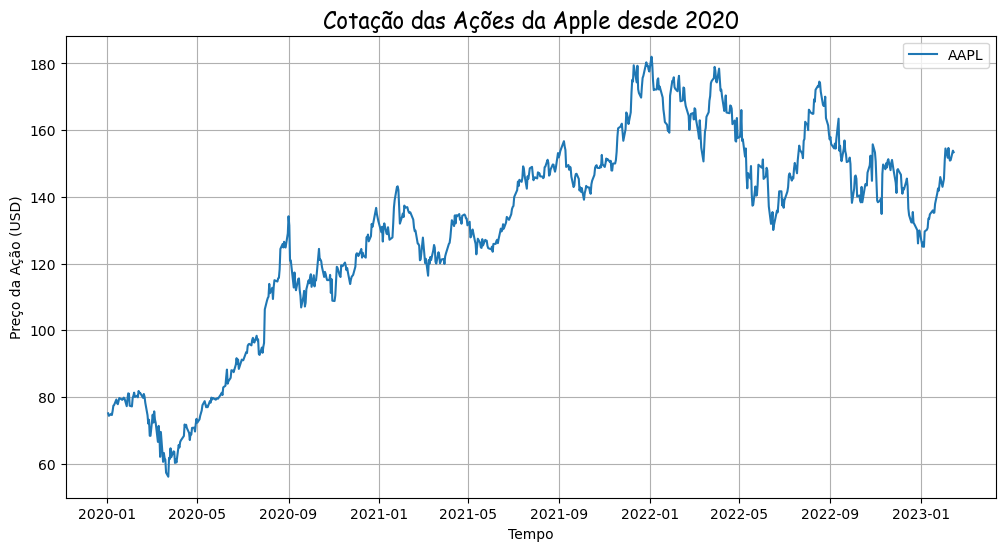

In [24]:
#Data Visualization

# Data in axis
x = df['Date']
y = df['Close']

# Graph's size (dpi)
plt.figure(figsize = (12,6), dpi = 100)

# Plot
plt.plot(x, y, label = 'AAPL')

# Title
plt.title('Cotação das Ações da Apple desde 2020', 
          fontdict = {'fontname': 'Comic Sans MS', 'fontsize': 16})

# Label
plt.xlabel('Tempo')
plt.ylabel('Preço da Ação (USD)')

# legend = on
plt.legend()

#Grid = on
plt.grid()

# Saves image n high resolution
plt.savefig('imagens/APPLSockPricefrom2020.png', dpi = 300)

# Plot
plt.show()